In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Data Exploratory for Zoo Dataset

In [2]:
df = pd.read_csv(r"datasets\Zoo\zoo.data")
df.head()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [3]:
df.columns = ["animal_name","hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


Dataset contains irregular entry and duplicates

In [5]:
#Removed duplciate
df.drop_duplicates(inplace = True)
#Remove irregular data
df = df.loc[df["animal_name"] != "girl"]
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  99 non-null     object
 1   hair         99 non-null     int64 
 2   feathers     99 non-null     int64 
 3   eggs         99 non-null     int64 
 4   milk         99 non-null     int64 
 5   airborne     99 non-null     int64 
 6   aquatic      99 non-null     int64 
 7   predator     99 non-null     int64 
 8   toothed      99 non-null     int64 
 9   backbone     99 non-null     int64 
 10  breathes     99 non-null     int64 
 11  venomous     99 non-null     int64 
 12  fins         99 non-null     int64 
 13  legs         99 non-null     int64 
 14  tail         99 non-null     int64 
 15  domestic     99 non-null     int64 
 16  catsize      99 non-null     int64 
 17  type         99 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 14.7+ KB


Looking through the dataset, some possibility for prediction would be, could we predict the type of animal from the different attributes of the animal.

Distribution of animals that have no_hair or hair

0    58
1    41
Name: hair, dtype: int64


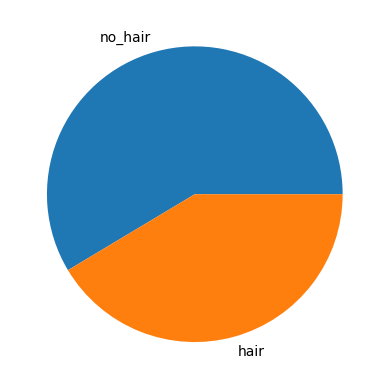

In [7]:
print(df["hair"].value_counts())
plt.pie(df['hair'].value_counts(), labels = ["no_hair" , "hair"])
plt.show()

Distribution of zoo animals that have no_feathers or feathers

0    79
1    20
Name: feathers, dtype: int64


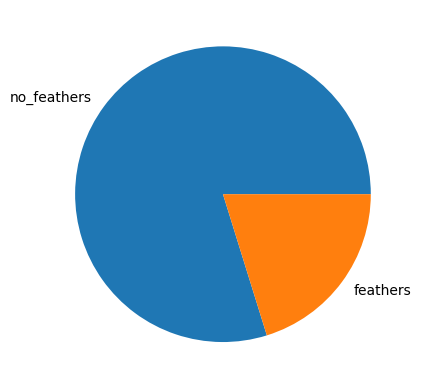

In [8]:
print(df["feathers"].value_counts())
plt.pie(df['feathers'].value_counts(), labels = ["no_feathers" , "feathers"])
plt.show()

Distribution of zoo animals that lay_egg or dont_lay_egg

1    59
0    40
Name: eggs, dtype: int64


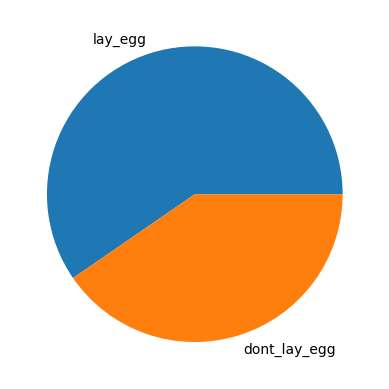

In [9]:
print(df["eggs"].value_counts())
plt.pie(df['eggs'].value_counts(), labels = ["lay_egg" , "dont_lay_egg"])
plt.show()

Distribution of zoo animals that are non_airborne or airborne

0    75
1    24
Name: airborne, dtype: int64


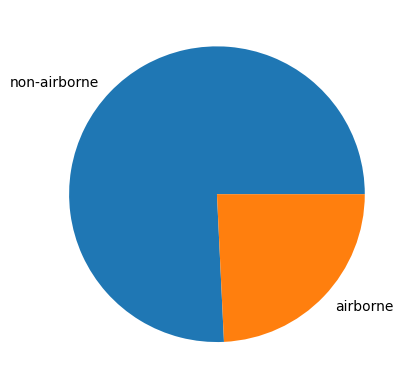

In [10]:
print(df["airborne"].value_counts())
plt.pie(df['airborne'].value_counts(), labels = ["non-airborne" , "airborne"])
plt.show()

Distribution of zoo animals that are aquatic and non_aquatic

0    63
1    36
Name: aquatic, dtype: int64


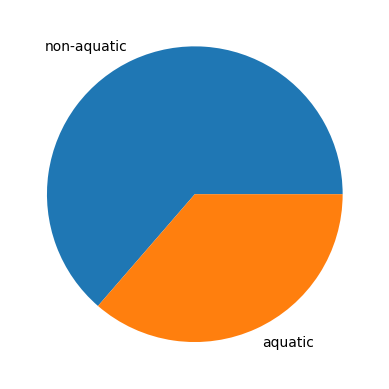

In [11]:
print(df["aquatic"].value_counts())
plt.pie(df['aquatic'].value_counts(), labels = ["non-aquatic" , "aquatic"])
plt.show()

Distribution of animals that are predator or non_predator

1    54
0    45
Name: predator, dtype: int64


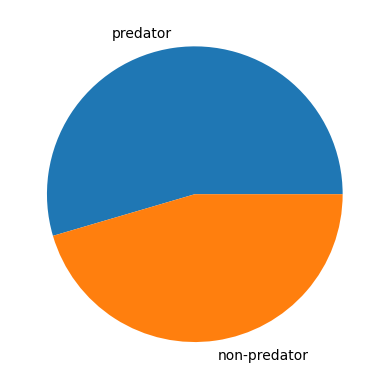

In [12]:
print(df["predator"].value_counts())
plt.pie(df['predator'].value_counts(), labels = ["predator" , "non-predator"])
plt.show()

Disitribution of zoo animal that are toothed or non-toothed

1    59
0    40
Name: toothed, dtype: int64


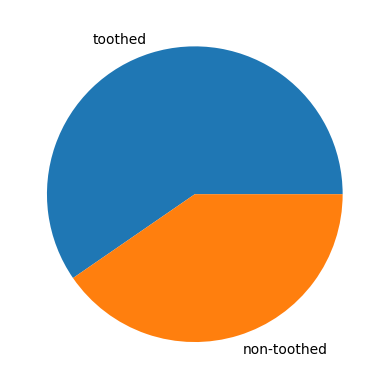

In [13]:
print(df["toothed"].value_counts())
plt.pie(df['toothed'].value_counts(), labels = ["toothed" , "non-toothed"])
plt.show()

Distribution of zoo animal that have backbone or no_backbone

1    81
0    18
Name: backbone, dtype: int64


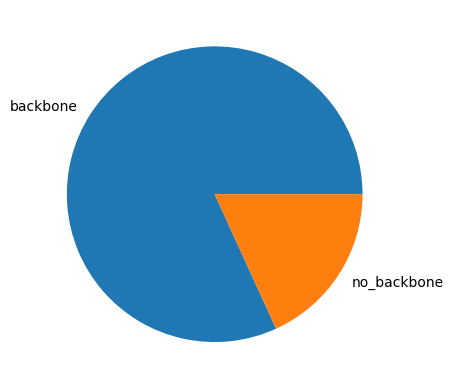

In [14]:
print(df["backbone"].value_counts())
plt.pie(df['backbone'].value_counts(), labels = ["backbone" , "no_backbone"])
plt.show()

Distribution of zoo animals that breathe or dont_breathe

1    78
0    21
Name: breathes, dtype: int64


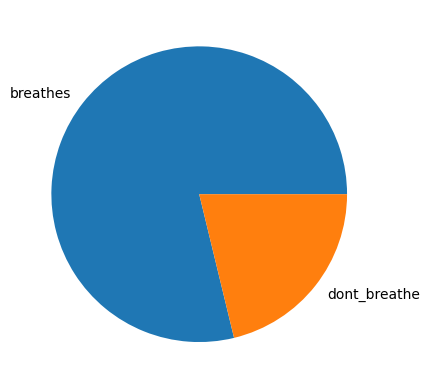

In [15]:
print(df["breathes"].value_counts())
plt.pie(df['breathes'].value_counts(), labels = ["breathes" , "dont_breathe"])
plt.show()

Distribution of zoo animals that are venomous or non_venomous

0    91
1     8
Name: venomous, dtype: int64


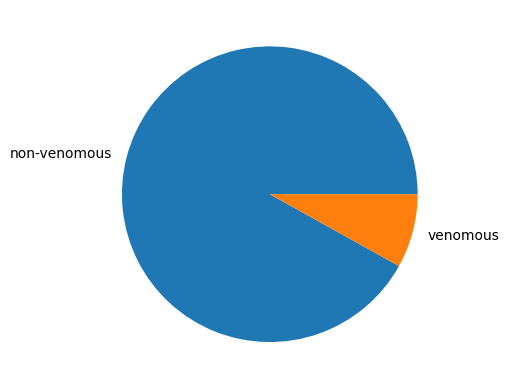

In [16]:
print(df["venomous"].value_counts())
plt.pie(df['venomous'].value_counts(), labels = ["non-venomous" , "venomous"])
plt.show()

Distribution of zoo animals with fins

0    82
1    17
Name: fins, dtype: int64


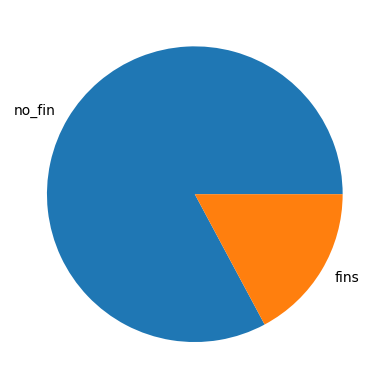

In [17]:
print(df["fins"].value_counts())
plt.pie(df['fins'].value_counts(), labels = ["no_fin" , "fins"])
plt.show()

Distribution of zoo animals with legs

4    37
2    26
0    23
6    10
8     2
5     1
Name: legs, dtype: int64


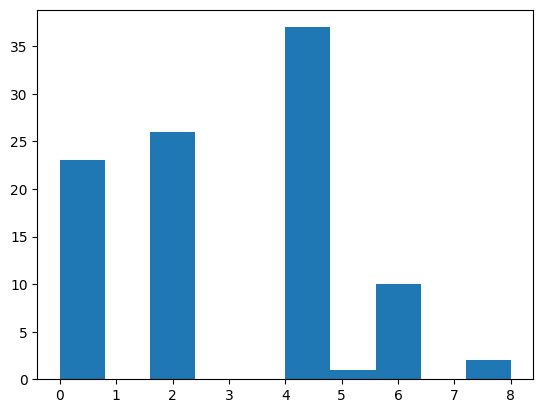

In [18]:
print(df["legs"].value_counts())
plt.hist(df['legs'])
plt.show()

Distribution of tail or no_tail in zoo animals

1    75
0    24
Name: tail, dtype: int64


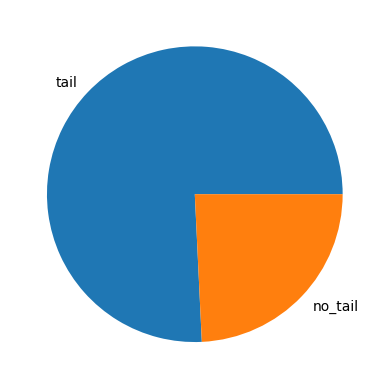

In [19]:
print(df["tail"].value_counts())
plt.pie(df['tail'].value_counts(), labels = ["tail" , "no_tail"])
plt.show()

Distribution of domesticated or non-domesticated zoo animal 

0    87
1    12
Name: domestic, dtype: int64


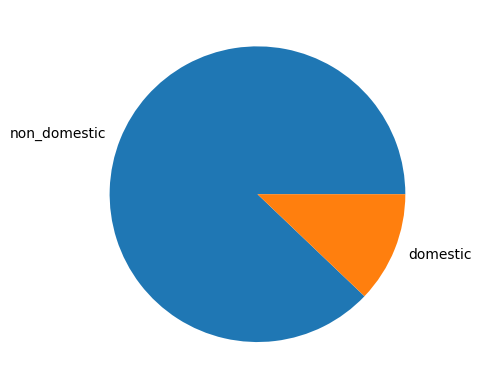

In [20]:
print(df["domestic"].value_counts())
plt.pie(df['domestic'].value_counts(), labels = ["non_domestic" , "domestic"])
plt.show()

Distribution of zoo aninal dataset according to its catsize

0    57
1    42
Name: catsize, dtype: int64


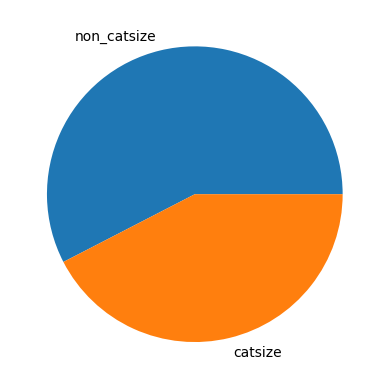

In [21]:
print(df["catsize"].value_counts())
plt.pie(df['catsize'].value_counts(), labels = ["non_catsize" , "catsize"])
plt.show()

Distribution of zoo animals dataset according to their type.

1    39
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


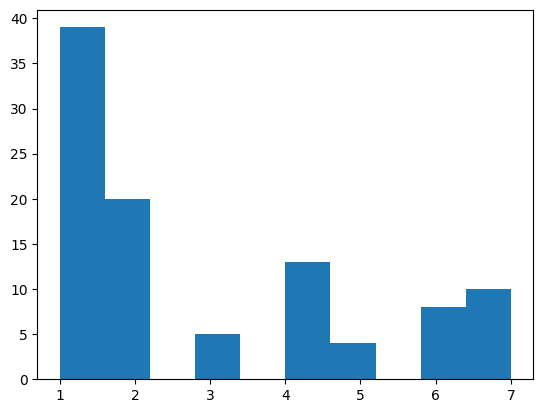

In [22]:
print(df["type"].value_counts())
plt.hist(df['type'])
plt.show()

C:\Users\Samuel Png\AppData\Local\Temp\ipykernel_14520\96100352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

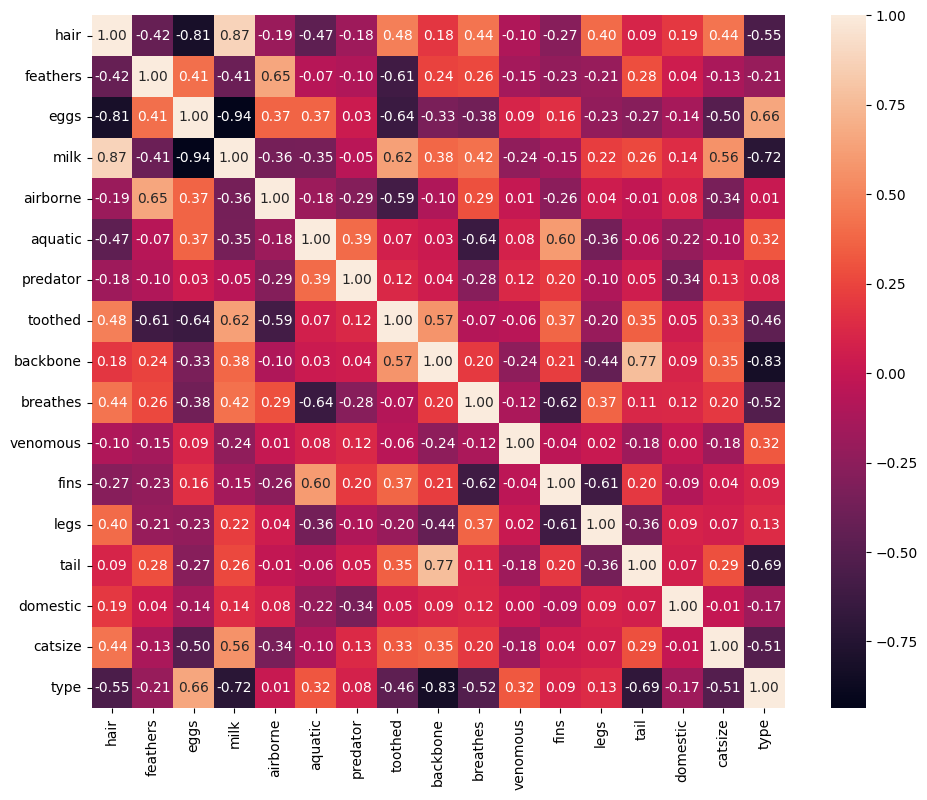

In [23]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax= 1, annot = True, square = True, fmt= ".2f")

Removes attributes that have <0.00 correlations with type

In [24]:
def cleanDf(argument):
    df.drop(argument,axis = 1, inplace = True)
    df.dropna()

In [25]:
cleanDf("hair")
cleanDf("feathers")
cleanDf("milk")
cleanDf("toothed")
cleanDf("backbone")
cleanDf("breathes")
cleanDf("tail")
cleanDf("domestic")
cleanDf("catsize")
cleanDf("animal_name")

In [26]:
df

,eggs,airborne,aquatic,predator,venomous,fins,legs,type
0,0,0,0,0,0,0,4,1
1,1,0,1,1,0,1,0,4
2,0,0,0,1,0,0,4,1
3,0,0,0,1,0,0,4,1
4,0,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,2,1
96,1,1,0,0,1,0,6,6
97,0,0,0,1,0,0,4,1
98,1,0,0,0,0,0,0,7


In [27]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('type')
    df['type'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return(record_list)

In [28]:
zoo_list = extract_df_col(df)
with open("datasets\Zoo\cleaned_attributes.txt", "w") as output:
    output.write(str(zoo_list))

['eggs', 'airborne', 'aquatic', 'predator', 'venomous', 'fins', 'legs', 'type']


# Creating Training and Test Sets

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [30]:
y = df["type"]
x = df.drop("type", axis = 1)

In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (74, 7) (74,)
Test set: 	 (25, 7) (25,)


### Classification Decision Tree Method

In [32]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [33]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[2 1 2 5 1 6 1 1 6 5 2 1 3 6 1 1 1 1 5 7 2 4 5 6 1]


In [34]:
zoo_dt_df = pd.DataFrame(data = dt_pred, columns = ["type"])
zoo_dt_df.head(15)

,type
0,2
1,1
2,2
3,5
4,1
5,6
6,1
7,1
8,6
9,5


In [35]:
print("Classification Accuracy \t: ", dectree.score(xTrain,yTrain))

Classification Accuracy 	:  1.0


In [36]:
print("Classification Accuracy \t: ", dectree.score(xTest,yTest))

Classification Accuracy 	:  0.76


In [37]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.76
The F score of Decision Tree is 0.7417142857142857


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[10,  0,  0,  0,  1,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  2,  2,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

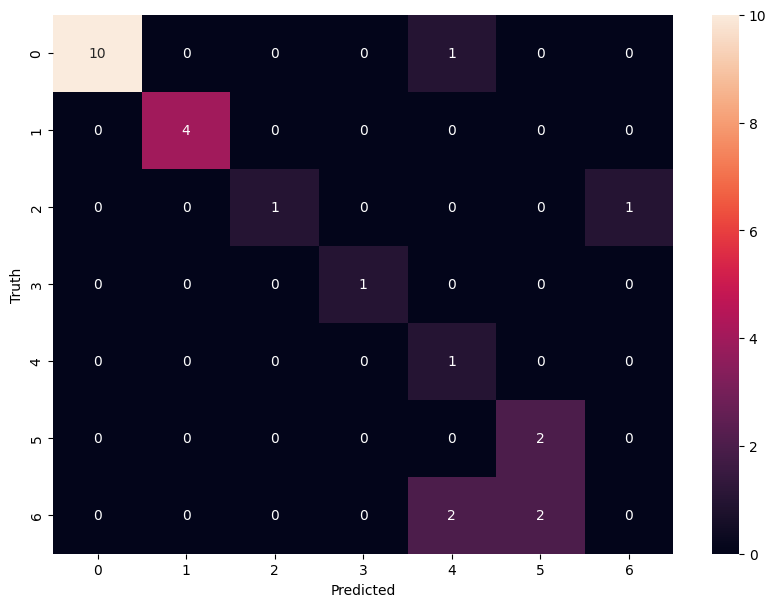

In [39]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [40]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest type", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type
0,1,1,0,1,0,0,2,2
1,0,0,0,0,0,0,2,1
2,1,0,1,1,0,0,2,2
3,1,0,1,1,0,0,4,5
4,0,0,0,0,0,0,4,1
5,1,0,0,0,0,0,6,6
6,0,0,0,1,0,0,4,1
7,0,0,0,0,0,0,4,1
8,1,1,0,0,0,0,6,6
9,1,0,1,1,0,0,4,7


In [41]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", zoo_dt_df)
xTestDF.head(20)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type,Decision Tree
0,1,1,0,1,0,0,2,2,2
1,0,0,0,0,0,0,2,1,1
2,1,0,1,1,0,0,2,2,2
3,1,0,1,1,0,0,4,5,5
4,0,0,0,0,0,0,4,1,1
5,1,0,0,0,0,0,6,6,6
6,0,0,0,1,0,0,4,1,1
7,0,0,0,0,0,0,4,1,1
8,1,1,0,0,0,0,6,6,6
9,1,0,1,1,0,0,4,7,5


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier


index : 11 
Accuracy : 0.8


Text(0, 0.5, 'Testing Accuracy')

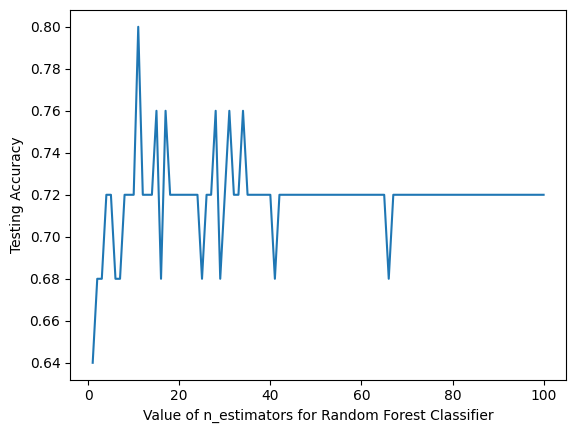

In [43]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i +1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i +1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [44]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=11)

In [45]:
model.score(xTest,yTest)

0.72

In [46]:
rf_pred = model.predict(xTest)

In [47]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.72
The F score of Random Forest is 0.6926984126984127


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[10,  0,  0,  0,  1,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  4,  0,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

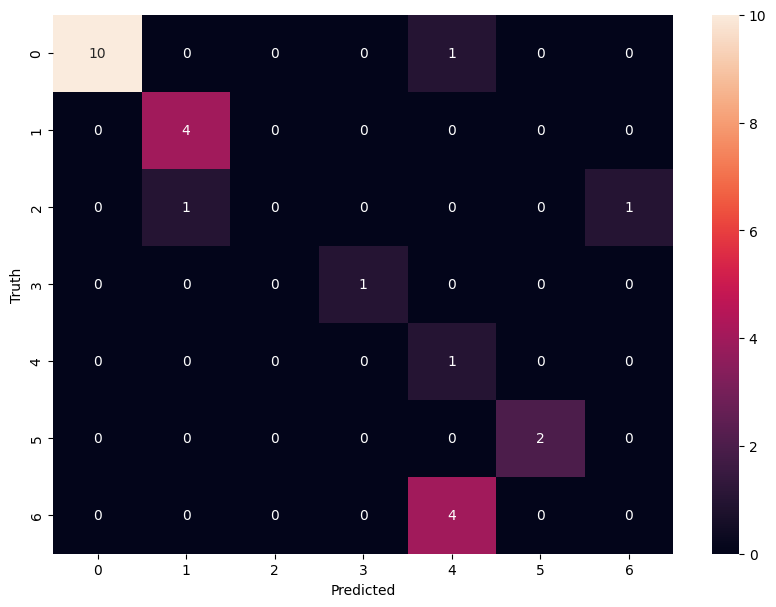

In [49]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [50]:
zoo_rf_df = pd.DataFrame(data = rf_pred, columns = ["type"])
zoo_rf_df.head(15)

,type
0,2
1,1
2,2
3,5
4,1
5,6
6,1
7,1
8,6
9,5


In [51]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", zoo_rf_df)
xTestDF.head(20)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type,Decision Tree,Random Forest
0,1,1,0,1,0,0,2,2,2,2
1,0,0,0,0,0,0,2,1,1,1
2,1,0,1,1,0,0,2,2,2,2
3,1,0,1,1,0,0,4,5,5,5
4,0,0,0,0,0,0,4,1,1,1
5,1,0,0,0,0,0,6,6,6,6
6,0,0,0,1,0,0,4,1,1,1
7,0,0,0,0,0,0,4,1,1,1
8,1,1,0,0,0,0,6,6,6,6
9,1,0,1,1,0,0,4,7,5,5


### K-Nearest-Neighbour Classification

In [52]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))

maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 1 
Accuracy : 0.72


Text(0, 0.5, 'Testing Accuracy')

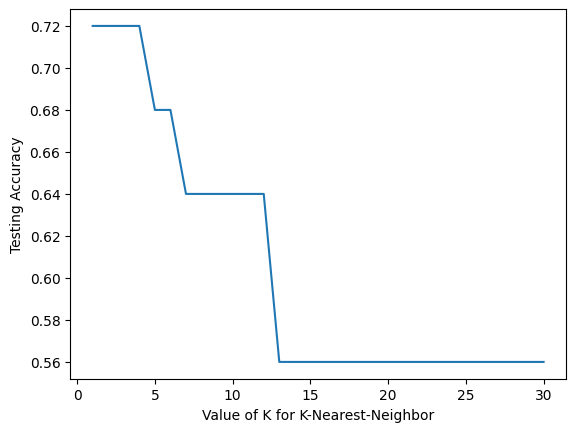

In [53]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [54]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=1)

Selected MaxKvalue as it provides the best testing accuracy

In [55]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[2 1 2 5 1 6 1 1 6 5 2 1 1 6 1 1 1 1 5 7 2 4 5 6 1]


In [56]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of Random Forest is {knnAccuracy}")
print(f"The F score of Random Forest is {knnFscore}")

The accuracy of Random Forest is 0.72
The F score of Random Forest is 0.6693333333333333


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[10,  0,  0,  0,  1,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  2,  2,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

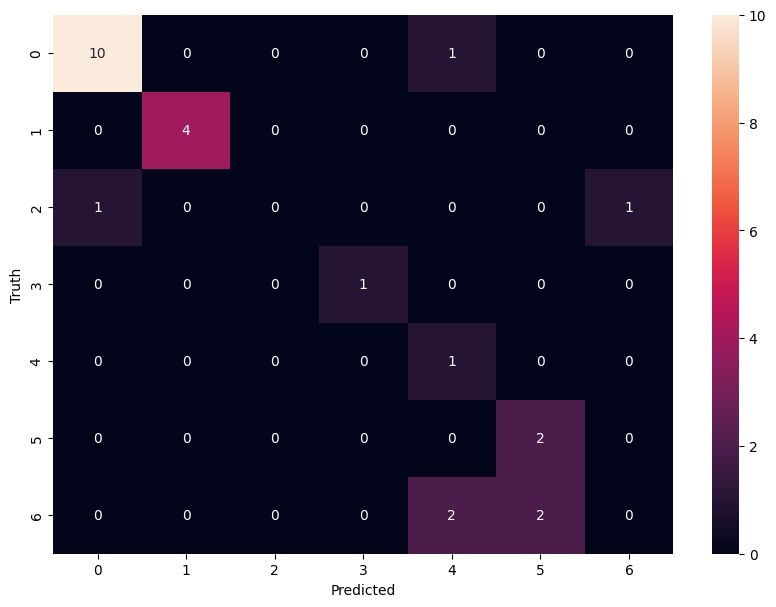

In [58]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [59]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["type"])
knnPredictedDF.head(10)


,type
0,2
1,1
2,2
3,5
4,1
5,6
6,1
7,1
8,6
9,5


In [60]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors
0,1,1,0,1,0,0,2,2,2,2,2
1,0,0,0,0,0,0,2,1,1,1,1
2,1,0,1,1,0,0,2,2,2,2,2
3,1,0,1,1,0,0,4,5,5,5,5
4,0,0,0,0,0,0,4,1,1,1,1
5,1,0,0,0,0,0,6,6,6,6,6
6,0,0,0,1,0,0,4,1,1,1,1
7,0,0,0,0,0,0,4,1,1,1,1
8,1,1,0,0,0,0,6,6,6,6,6
9,1,0,1,1,0,0,4,7,5,5,5


### Support Vector Machines

In [61]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [62]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[2 1 2 1 1 6 1 1 6 1 2 1 1 6 1 1 1 1 1 7 2 4 1 6 1]


In [63]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.72
The F score of Support Vector Machines is 0.6256410256410256


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 2,  0,  0,  0,  0,  2,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

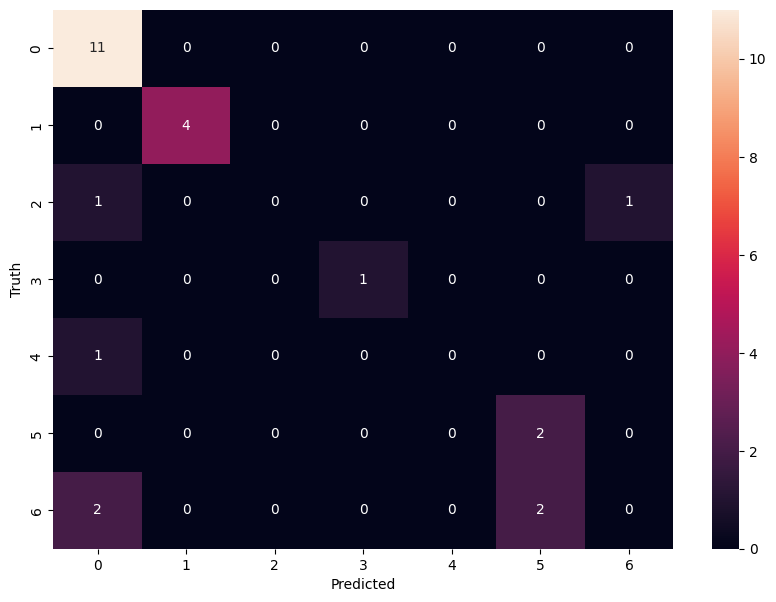

In [65]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [66]:
zoo_svm_df = pd.DataFrame(data = svm_pred, columns = ["type"])
zoo_svm_df.head(15)

,type
0,2
1,1
2,2
3,1
4,1
5,6
6,1
7,1
8,6
9,1


In [67]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", zoo_svm_df)
xTestDF.head(20)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,1,1,0,1,0,0,2,2,2,2,2,2
1,0,0,0,0,0,0,2,1,1,1,1,1
2,1,0,1,1,0,0,2,2,2,2,2,2
3,1,0,1,1,0,0,4,5,5,5,5,1
4,0,0,0,0,0,0,4,1,1,1,1,1
5,1,0,0,0,0,0,6,6,6,6,6,6
6,0,0,0,1,0,0,4,1,1,1,1,1
7,0,0,0,0,0,0,4,1,1,1,1,1
8,1,1,0,0,0,0,6,6,6,6,6,6
9,1,0,1,1,0,0,4,7,5,5,5,1


### Neural Network

In [68]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(16,), random_state=1,activation = "relu", max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [69]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[2 1 5 5 1 6 1 1 6 5 2 1 3 5 1 1 1 1 5 7 2 4 5 5 1]


In [70]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.72
The F score of Neural Network is 0.7395238095238096


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[10,  0,  0,  0,  1,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  4,  0,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

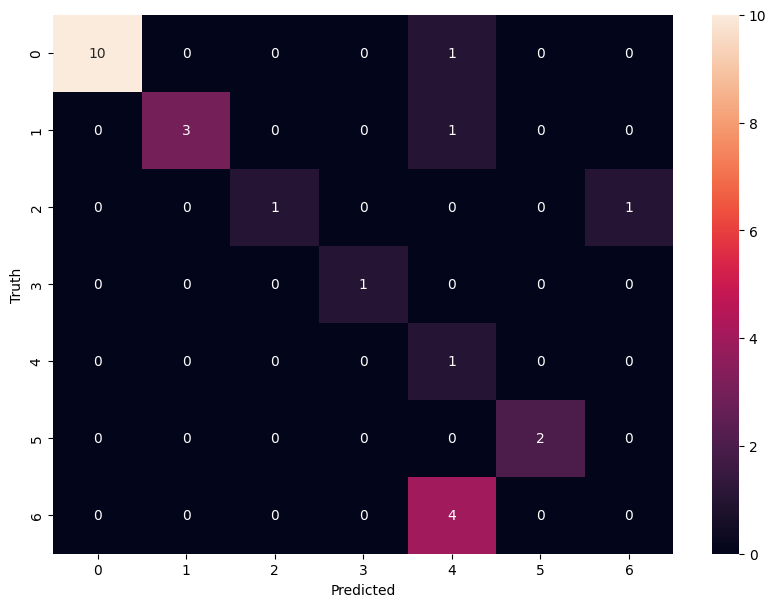

In [72]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
zoo_nn_df = pd.DataFrame(data = nn_pred, columns = ["type"])
zoo_nn_df.head(15)

,type
0,2
1,1
2,5
3,5
4,1
5,6
6,1
7,1
8,6
9,5


In [74]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", zoo_nn_df)
xTestDF.head(20)

,eggs,airborne,aquatic,predator,venomous,fins,legs,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,1,1,0,1,0,0,2,2,2,2,2,2,2
1,0,0,0,0,0,0,2,1,1,1,1,1,1
2,1,0,1,1,0,0,2,2,2,2,2,2,5
3,1,0,1,1,0,0,4,5,5,5,5,1,5
4,0,0,0,0,0,0,4,1,1,1,1,1,1
5,1,0,0,0,0,0,6,6,6,6,6,6,6
6,0,0,0,1,0,0,4,1,1,1,1,1,1
7,0,0,0,0,0,0,4,1,1,1,1,1,1
8,1,1,0,0,0,0,6,6,6,6,6,6,6
9,1,0,1,1,0,0,4,7,5,5,5,1,5


# Evaluation Metrics of the Machine Learning algorithms

In [75]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore],
                   "SVM" : [svmAccuracy , svmFscore],
                   "NN" : [nnAccuracy, nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree" , "SVM" ,"NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.720000,0.720000,0.760000,0.720000,0.720000
Fscore,0.669333,0.692698,0.741714,0.625641,0.739524
